## Análisis EDA: Items ADQ

### 1. Carga de datos

In [2]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### Leyendo el dataset, convirtiéndolo a parquet y mostrando los primeros rows

In [27]:
items_df = pd.read_csv('../../data/Processed/csv_files/items_adq_sesna_data.csv')
items_df.to_parquet('../../data/Processed/parquet_files/items_adq_sesna_data.parquet')

In [3]:
items_df = pd.read_parquet('../../data/Processed/parquet_files/items_adq_sesna_data.parquet')

In [4]:
items_df.shape

(12179867, 12)

### 2. Análisis del problema

#### 2.1 Estructura de los datos

In [5]:
items_df.head()

,cve_expediente,cve_contrato,items_unit_val_currency_awards,items_unit_val_amount_awards,items_unit_name_awards,items_classion.uri,items_classi_scheme_awards,items_class_id_awards,items_class_description_awards,items_quantity_awards,items_id_awards,items_description_awards
0,1892834,2038777,MXN,150000.00,Estudio,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,33900008,Servicio de estudios clinicos,1.00,5801086,SERVICIOS MEDICOS SUBROGADOS DE ESPECIALIZACIO...
1,2010079,2186605,MXN,75.43,Hora,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,33900012,Servicios integrales,160.00,6076272,TALLER CULTURAL DE YOGA
2,2095070,2294356,MXN,9900.00,Servicio,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,38300001,Congresos y convenciones,1.00,7168070,PRIMERA REUNIÓN ORDINARIA DEL CONSEJO NACIONAL...
3,2095206,2294524,MXN,150.00,kilocal/kilogramo,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,38300001,Congresos y convenciones,4.00,6758280,GALLETAS
4,2095206,2294524,MXN,270.00,Servicio,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,38300001,Congresos y convenciones,300.00,6758270,comida buffet(carne de res en guajillo con n...


In [6]:
items_df.tail()

,cve_expediente,cve_contrato,items_unit_val_currency_awards,items_unit_val_amount_awards,items_unit_name_awards,items_classion.uri,items_classi_scheme_awards,items_class_id_awards,items_class_description_awards,items_quantity_awards,items_id_awards,items_description_awards
12179862,2570529,2983126,MXN,60.00,Servicio,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,22100394,Productos alimenticios para personas derivado ...,775.00,8456783,ALIMENTOS SUBROGADOS (Desayuno)
12179863,2570529,2983126,MXN,60.00,Servicio,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,22100394,Productos alimenticios para personas derivado ...,775.00,8456784,ALIMENTOS SUBROGADOS (Comida)
12179864,2570529,2983126,MXN,60.00,Servicio,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,22100394,Productos alimenticios para personas derivado ...,1395.00,8456786,ALIMENTOS SUBROGADOS (Personal)
12179865,2570623,2984798,MXN,728815.86,Unidad,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,54100027,"Camioneta (guayin, panel, estacas-redilas)",10.00,8463786,"ELECTRIC MINIVAN (670 kg), ¿VEHÍCULO MONOVOLUM..."
12179866,2571566,2987316,MXN,182243.45,Servicio,https://compranetinfo.hacienda.gob.mx/descarga...,CUCOP,31400001,Servicio telefonico convencional,1.00,8472400,Servicio Administrado de Telefonía Local y Lar...


#### 2.2 Información General

In [7]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12179867 entries, 0 to 12179866
Data columns (total 12 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   cve_expediente                  int64  
 1   cve_contrato                    int64  
 2   items_unit_val_currency_awards  object 
 3   items_unit_val_amount_awards    float64
 4   items_unit_name_awards          object 
 5   items_classion.uri              object 
 6   items_classi_scheme_awards      object 
 7   items_class_id_awards           int64  
 8   items_class_description_awards  object 
 9   items_quantity_awards           float64
 10  items_id_awards                 int64  
 11  items_description_awards        object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ GB


In [8]:
column_stats = []
# Recorrer las columnas del dataframe
for col in items_df.columns:
    num_values = items_df[col].count()
    num_unique_values = items_df[col].nunique()
    column_stats.append([col, num_values, num_unique_values])

# Crear un nuevo dataframe con las estadísticas
column_stats_df = pd.DataFrame(column_stats, columns=['nombre de la columna', 'numero de valores', 'numero de valores únicos'])

# Mostrar el dataframe resultante
column_stats_df

,nombre de la columna,numero de valores,numero de valores únicos
0,cve_expediente,12179867,334981
1,cve_contrato,12179867,547253
2,items_unit_val_currency_awards,12179867,6
3,items_unit_val_amount_awards,12179206,347559
4,items_unit_name_awards,12179206,259
5,items_classion.uri,12179867,1
6,items_classi_scheme_awards,12179867,1
7,items_class_id_awards,12179867,11072
8,items_class_description_awards,12179867,10785
9,items_quantity_awards,12179867,45739


#### 2.3 Estadísticas descriptivas

In [10]:
items_df = items_df.astype({
    'cve_expediente': 'str',
    'cve_contrato': 'str',
    'items_class_id_awards': 'str',
    'items_id_awards': 'str'
})

In [11]:
items_df.describe()

,items_unit_val_amount_awards,items_quantity_awards
count,12179206.00,12179867.00
mean,494759.96,5612.17
std,46022783.17,1106723.28
min,-5841890.72,0.00
25%,42.00,1.00
50%,279.00,10.00
75%,3654.14,116.00
max,77259004011.00,2100187530.97


In [12]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12179867 entries, 0 to 12179866
Data columns (total 12 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   cve_expediente                  object 
 1   cve_contrato                    object 
 2   items_unit_val_currency_awards  object 
 3   items_unit_val_amount_awards    float64
 4   items_unit_name_awards          object 
 5   items_classion.uri              object 
 6   items_classi_scheme_awards      object 
 7   items_class_id_awards           object 
 8   items_class_description_awards  object 
 9   items_quantity_awards           float64
 10  items_id_awards                 object 
 11  items_description_awards        object 
dtypes: float64(2), object(10)
memory usage: 1.1+ GB


### 3. Análisis Univariado

#### 3.1 Variables Numéricas

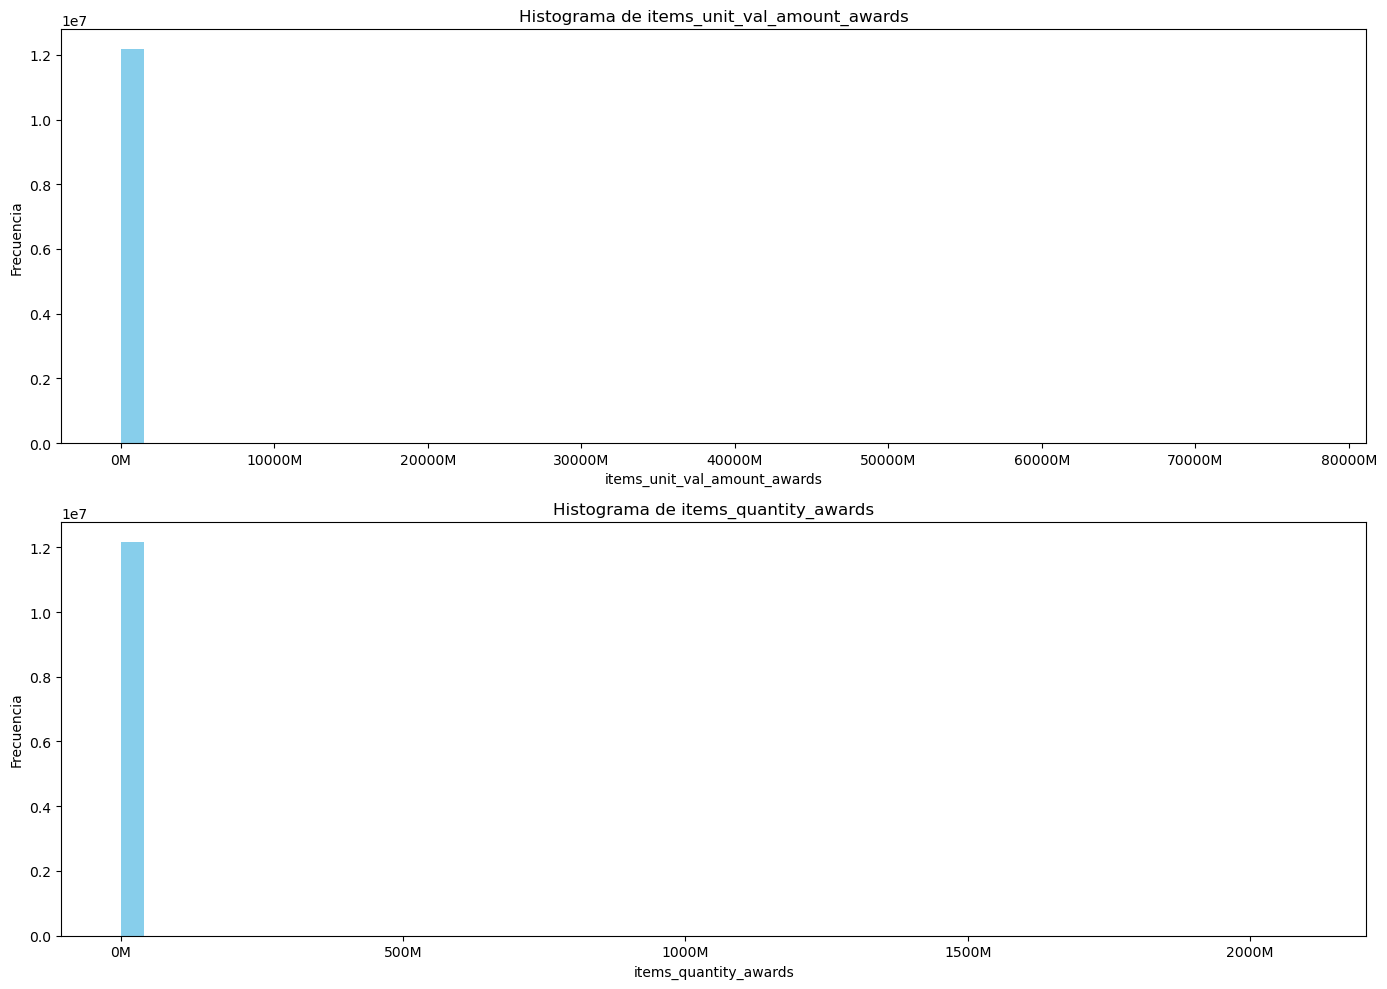

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Crear una figura para los histogramas de variables numéricas
plt.figure(figsize=(14, 10))

# Histogramas para las variables numéricas
numerical_columns = ['items_unit_val_amount_awards', 'items_quantity_awards']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 1, i)  # Crear subgráficos
    plt.hist(items_df[column].dropna(), bins=50, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {column}')
    
    # Formatear el eje X para mostrar en millones
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x*1e-6)}M'))

plt.tight_layout()
plt.show()

#### 3.2 Variables Categóricas

<Figure size 640x480 with 0 Axes>

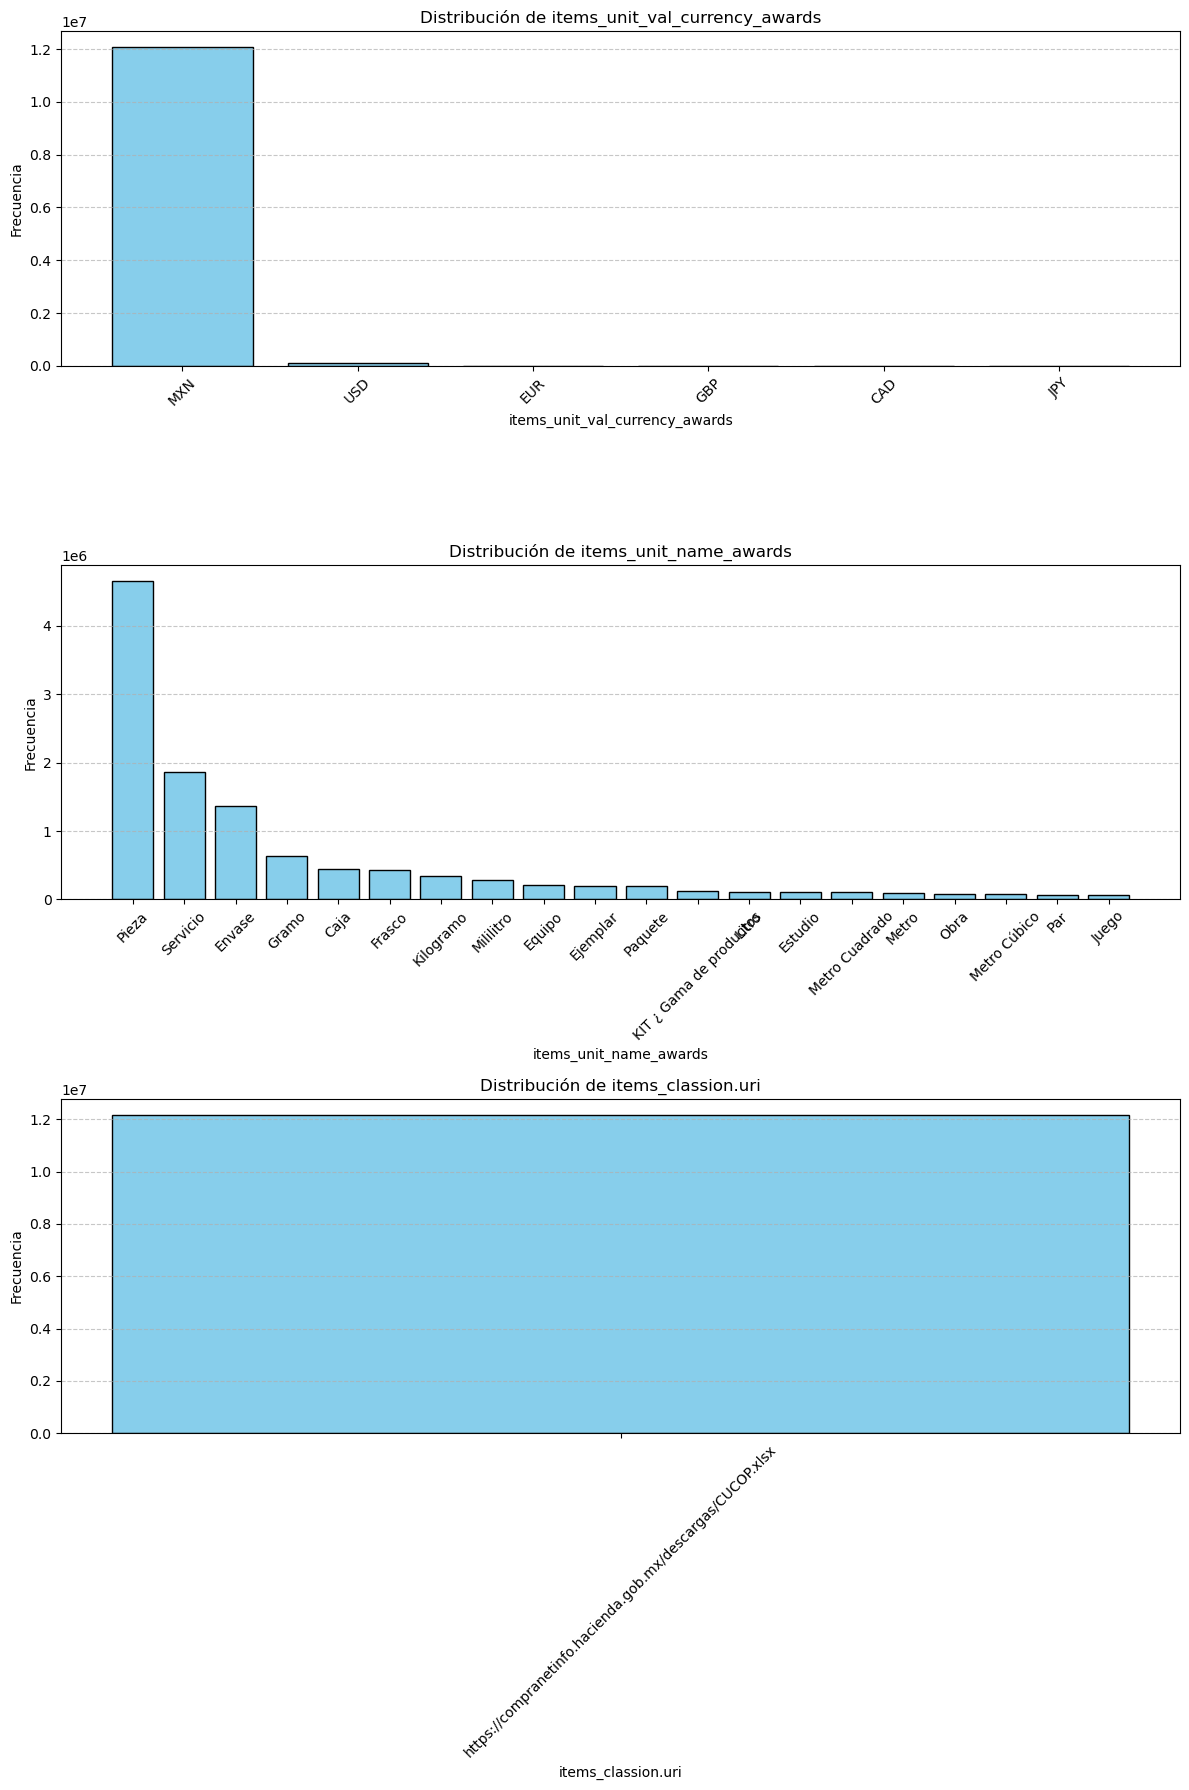

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

axes[0].set_title('Distribución de items_unit_val_amount_awards')
axes[0].set_xlabel('Valor del Monto')
axes[0].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de items_quantity_awards')
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')

# Formatear ejes para mostrar valores en millones
for ax in axes:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x*1e-6)))
plt.tight_layout()
plt.show()

# Crear histogramas para las variables categóricas
categorical_columns = ['items_unit_val_currency_awards', 'items_unit_name_awards', 'items_classion.uri']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
for i, col in enumerate(categorical_columns):
    value_counts = items_df[col].value_counts().head(20)
    axes[i].bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 5. Detección de Outliers

#### 5.1 IQR (Rango intercuartil)

In [18]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [19]:
# Detecting outliers in items_unit_val_amount_awards
outliers_value_amount = detect_outliers(items_df, 'items_unit_val_amount_awards')
print(f"Outliers in 'items_unit_val_amount_awards': {len(outliers_value_amount)}")

Outliers in 'items_unit_val_amount_awards': 2335579


In [20]:
# Detecting outliers in items_quantity_awards
outliers_value_amount = detect_outliers(items_df, 'items_quantity_awards')
print(f"Outliers in 'items_quantity_awards': {len(outliers_value_amount)}")

Outliers in 'items_quantity_awards': 2125700


#### 5.2 Box Plots

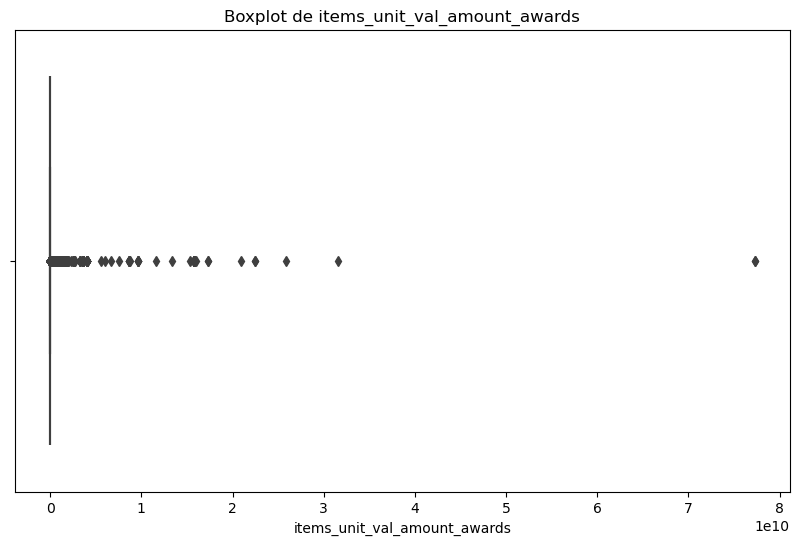

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=items_df['items_unit_val_amount_awards'])
plt.title('Boxplot de items_unit_val_amount_awards')
plt.show()

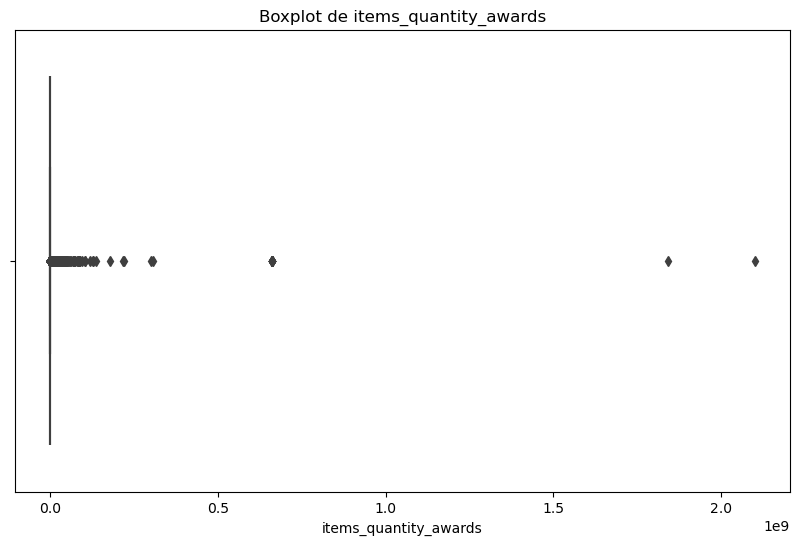

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=items_df['items_quantity_awards'])
plt.title('Boxplot de items_quantity_awards')
plt.show()

### 6. Análisis Multivariado

#### 6.1 Análisis de Valor por Clase de Items: valor promedio de los items por cada clase.

In [24]:
value_by_class = items_df.groupby('items_class_description_awards')['items_unit_val_amount_awards'].mean().reset_index()
value_by_class = value_by_class.sort_values(by='items_unit_val_amount_awards', ascending=False)
value_by_class

,items_class_description_awards,items_unit_val_amount_awards
8546,Plataforma para carros de ferrocarril,31520457949.24
9105,Rehabilitacion de banquetas,1015897685.82
3917,Carro pasajeros (metro),783341381.64
3209,Base para transductores del magnetometro (eq. ...,662006086.23
3052,Avion monomotor turboreactor,575992720.60
...,...,...
747,010.000.4142.00 Folitropina beta,0.00
5588,Esmolol,0.00
6383,Harina de tuberculos (para su comercializacion),0.00
5706,Estrogenos conjugados,0.00


### 7. Preguntas de Negocio

#### 7.1 ¿Existe alguna correlación entre la cantidad de items y su valor?

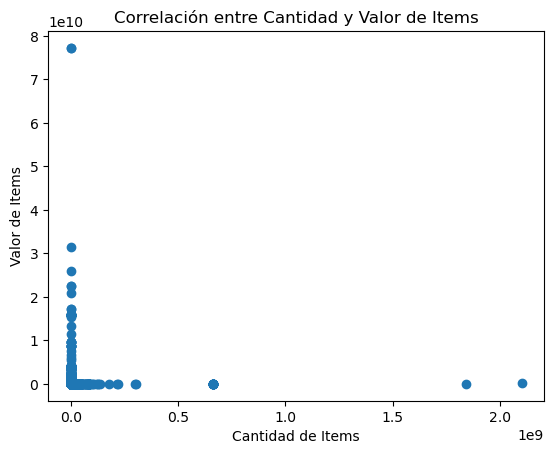

In [27]:
plt.scatter(items_df['items_quantity_awards'], items_df['items_unit_val_amount_awards'])
plt.xlabel('Cantidad de Items')
plt.ylabel('Valor de Items')
plt.title('Correlación entre Cantidad y Valor de Items')
plt.show()

#### 7.2 ¿Cuál es la distribución de valores de items por tipo de moneda?

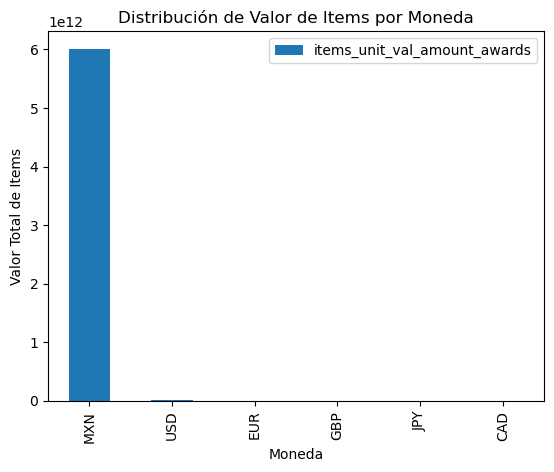

In [28]:
value_by_currency = items_df.groupby('items_unit_val_currency_awards')['items_unit_val_amount_awards'].sum().reset_index()
value_by_currency = value_by_currency.sort_values(by='items_unit_val_amount_awards', ascending=False)
value_by_currency.plot(kind='bar', x='items_unit_val_currency_awards', y='items_unit_val_amount_awards')
plt.xlabel('Moneda')
plt.ylabel('Valor Total de Items')
plt.title('Distribución de Valor de Items por Moneda')
plt.show()

#### 7.3 ¿Cuáles son las clases de items con la mayor cantidad total adquirida?

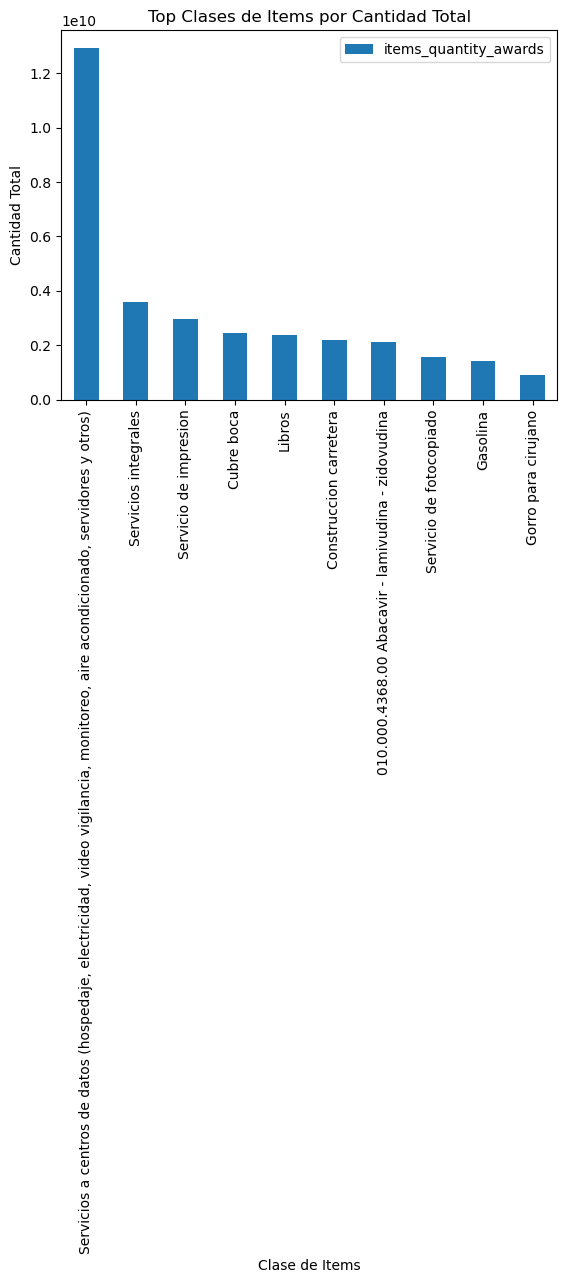

In [29]:
top_classes_by_quantity = items_df.groupby('items_class_description_awards')['items_quantity_awards'].sum().reset_index()
top_classes_by_quantity = top_classes_by_quantity.sort_values(by='items_quantity_awards', ascending=False).head(10)
top_classes_by_quantity.plot(kind='bar', x='items_class_description_awards', y='items_quantity_awards')
plt.xlabel('Clase de Items')
plt.ylabel('Cantidad Total')
plt.title('Top Clases de Items por Cantidad Total')
plt.show()

#### 7.4 Top 10 Contratos por Cantidad de Items Suministrados

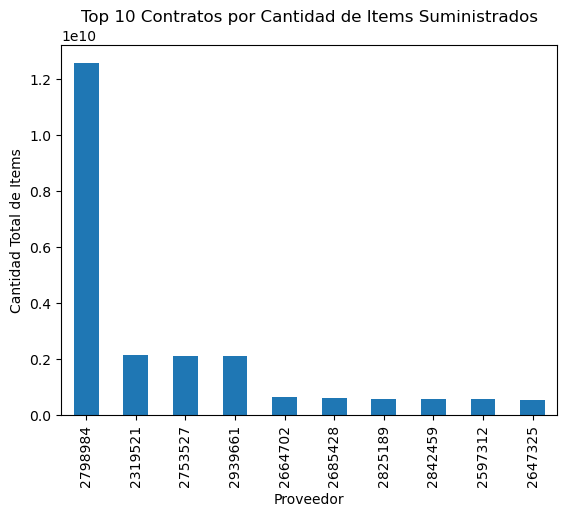

In [33]:
suppliers_items_count = items_df.groupby('cve_contrato')['items_quantity_awards'].sum().sort_values(ascending=False).head(10)
suppliers_items_count.plot(kind='bar')
plt.xlabel('Proveedor')
plt.ylabel('Cantidad Total de Items')
plt.title('Top 10 Contratos por Cantidad de Items Suministrados')
plt.show()